<a href="https://colab.research.google.com/github/williamscli/CS539-Machine_Learning/blob/main/Shark_tank_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2-1: Exploratory Data Analysis


## Overview

Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis.

# Shark Tank Introduction

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd
import numpy as np

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sharktank.csv. Read in the data into a Pandas `DataFrame`.

In [ ]:
# Read data
url = "https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sharktank.csv"
df = pd.read_csv(url)

# Show data
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
# Create varaible storing all investor columns
investor_cols = ['Corcoran', 'Cuban', 'Greiner', 'Herjavec', 'John', "O'Leary", 'Harrington', 'Guest']

# Replace all NAN values with 0
df[investor_cols] = df[investor_cols].fillna(0)

# Show first 5 rows
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
# Verify Amount and Equity dtype
print('Amount has dtype: {}'.format(df['Amount'].dtype))
print('Equity has dtype: {}'.format(df['Equity'].dtype))


# Remove $ sign from Amount values and % from Equity values
df['Amount'] = df['Amount'].str.replace(r'[^0-9]+', '')
df['Equity'] = df['Equity'].str.replace(r'[^0-9]+', '')

# Replace Amount and Equity NAN values to 0
df['Amount'] = df['Amount'].fillna(0)
df['Equity'] = df['Equity'].fillna(0)

# Convert Amount and Equity column values from object to float
df['Amount'] = df['Amount'].astype(float)
df['Equity'] = df['Equity'].astype(float)

# Convert Equity column from % to decimal
df['Equity'] = df['Equity']/100

# Confirm Amount and Equity dtype value was converted to float
print('Amount dtype changed to: {}'.format(df['Amount'].dtype))
print('Equity dtype changed to: {}'.format(df['Equity'].dtype))

df.head()

Amount has dtype: object
Equity has dtype: object
Amount dtype changed to: float64
Equity dtype changed to: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
# Calculate company valuation
df['Valuations'] = df['Amount'] / df['Equity']

df['Valuations'] = df['Valuations'].fillna(0)

# Filter out rows with an Equity of 0 to remove inf values in Valuations
query = df[(df['Equity'] > 0 )]

# Find Company with highest valuation
highest_val_company = query.iloc[(query['Valuations']).argmax()].Company
highest_val = query.iloc[query['Valuations'].argmax()].Valuations
highest_val_invest = query.iloc[query['Valuations'].argmax()].Amount

# Find company with highest total investment Amount
highest_invest_company = query.iloc[query['Amount'].argmax()].Company
highest_invest = query.iloc[query['Amount'].argmax()].Amount
highest_invest_val = query.iloc[query['Amount'].argmax()].Valuations

print('The company with the highest valuation was {}. The investment amount by the sharks was ${:,.2f} with a valuation of ${:,.2f}.'.format(highest_val_company, highest_val_invest, highest_val))
print('The company with the largest total investment was {}. The investment amount by the sharks was ${:,.2f} with a valuation of ${:,.2f}.'.format(highest_invest_company, highest_invest, highest_invest_val))

#df.head()

The company with the highest valuation was Zipz. The investment amount by the sharks was $2,500,000.00 with a valuation of $25,000,000.00.
The company with the largest total investment was AirCar. The investment amount by the sharks was $5,000,000.00 with a valuation of $10,000,000.00.


**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons? Avoid loops.

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [ ]:
# Create column of calculated amounts invested per Shark
df['Amount Invested per Shark'] = df['Amount'] / df[investor_cols].sum(axis = 1)

# Replace NAN with 0
df['Amount Invested per Shark'] = df['Amount Invested per Shark'].fillna(0)

# Function Inputs: did shark invest and amount invested -> Output: Total amount invested by shark
myfunc = lambda shark, col_name, amount : print('{} invested a total of ${:,.2f}.'.format( df.columns[df.columns.get_loc(col_name)], (shark * amount).sum()))


# Function Calls
myfunc(df['Corcoran'], "Corcoran", df['Amount Invested per Shark'] )
myfunc(df['Cuban'], "Cuban", df['Amount Invested per Shark'] )
myfunc(df['Greiner'], "Greiner", df['Amount Invested per Shark'] )
myfunc(df['Herjavec'], "Herjavec", df['Amount Invested per Shark'] )
myfunc(df['John'], "John", df['Amount Invested per Shark'] )
myfunc(df["O'Leary"], "O'Leary", df['Amount Invested per Shark'] )
myfunc(df['Harrington'], "Harrington", df['Amount Invested per Shark'] )
myfunc(df['Guest'], "Guest", df['Amount Invested per Shark'] )

df.head()

Corcoran invested a total of $4,912,500.00.
Cuban invested a total of $17,817,500.00.
Greiner invested a total of $8,170,000.00.
Herjavec invested a total of $16,297,500.00.
John invested a total of $8,154,000.00.
O'Leary invested a total of $7,952,500.00.
Harrington invested a total of $800,000.00.
Guest invested a total of $400,000.00.


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuations,Amount Invested per Shark
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,90909.090909,50000.0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,920000.000000,230000.0
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.0


**Cuban invested the most money at ~$18 million.**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

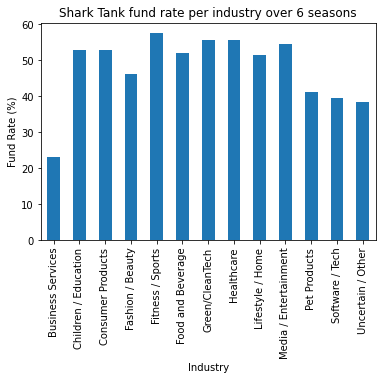

In [ ]:
import matplotlib.pyplot as plt
# Calculate the fund rate for each industry and convert to percentage
funding_rate = (query.groupby('Industry')['Equity'].count() / df.groupby('Industry')['Equity'].count()).multiply(100)

#print(funding_rate)

plt.figure()
funding_rate.plot(kind="bar", xlabel="Industry", ylabel="Fund Rate (%)", title="Shark Tank fund rate per industry over 6 seasons")





# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---